---

# DS400: Assignment V (Python)

##### Simon Andres (Student ID: 4148078)
##### January 31, 2023

Note: I worked together with Christopher Forschner and Janik Müller (exchanged some ideas)

***

### Setting up a new GitHub repository

<div class="alert alert-block alert-info">
1./2./3./4. GitHub setup: registration, initializing repository, documentation of process
</div>

The GitHub setup was done, all steps of this project are documented in my repository, follow this link: https://github.com/Studymon/DSPM_Assignment5

**Note for Prof. Mayer:** I followed my usual workflow (code R Markdown &rarr; code Python part in Spyder &rarr; implement to jupyter notebook). For the Python part, I documented all changes in the .ipy script in the `/DSPM_Assignment5` subfolder. As creating the .ipynb is mainly stitching together the Markdown parts from the .Rmd and the relevant code chunks from the Spyder script, there is no version control/history for the notebook on GitHub.

***

### Getting to know the API

<div class="alert alert-block alert-info">
5. Visit the documentation website for the API provided by ticketmaster.com. Familiarize yourself
with the features and functionalities of the Ticketmaster *Discovery* API. Have a particular look at
rate limits.
</div>

I made myself familiar with the Ticketmaster Discovery API and understand that there is a rate limit of max. 5 requests per second and a maximum number of daily requests of 5000.


<div class="alert alert-block alert-info">
6. Within the scope of this assignment, you do **not** have to request your own API key. Instead retrieve
a valid key from the API Explorer. This API key enables you to perform the `GET` requests needed
throughout this assignment. Even though this API key is not secret per se (it is publicly visible on the
API Explorer website), please comply to the common secrecy practices discussed in the lecture and the
tutorial: Treat the API key as a **secret** token. Your API key should neither appear in the code that you
are submitting nor in your public GitHub repository.
</div>

To comply with the common secrecy practices, the key was stored in a separate script that is stored in a subfolder `/api_keys_py` excluded from syncing with the GitHub repository through the `.gitignore` file.

In [1]:
# Preparations

# Clear workspace
%reset -f


# Import os module and other packages
import os
import numpy as np
import pandas as pd
import requests
import time

# Set Working Directory (only in the notebook)
os.chdir("C:/Data Science/Python/2022 DS Project Management/DSPM_Assignment5/DSPM_Assignment5_Python")

# source the ticketmaster key from separate script
with open("./api_keys_py/tm_key.py") as script:
  exec(script.read())

***

### Interacting with the API - the basics

<div class="alert alert-block alert-info">
7. Perform a first `GET` request, that searches for event venues in Germany (`countryCode = "DE"`). Extract
the `content` from the `response` object and inspect the resulting list. Describe what you can see.
</div>

In [2]:
# make request
firstVenues = requests.get("https://app.ticketmaster.com/discovery/v2/venues.json?",
                           params = {"apikey": tm_key,
                                     "countryCode": "DE",
                                     "locale": "*"}).json()

# look at page contents
firstVenues.get("page")


{'size': 20, 'totalElements': 12935, 'totalPages': 647, 'number': 0}

We see that for our request there is a total of 12935 elements. However, our specific request only yields the first 20 results, as that is the default number of search results per page for the ticketmaster API. Thus, there are 647 pages in total. The first page index is zero.

In [3]:
# extract total number of results
n = firstVenues["page"]["totalElements"]

# results per page
n_perPage = firstVenues["page"]["size"]

# look at first elements embedded in subdict
firstVenues["_embedded"]["venues"][0]

{'name': 'Grosse Freiheit 36',
 'type': 'venue',
 'id': 'KovZpZAn6vEA',
 'test': False,
 'url': 'http://www.ticketmaster.de/venue/287636',
 'locale': 'en-de',
 'images': [{'ratio': '16_9',
   'url': 'https://s1.ticketm.net/dbimages/962v.',
   'width': 205,
   'height': 115,
   'fallback': False}],
 'postalCode': '22767',
 'timezone': 'Europe/Berlin',
 'city': {'name': 'Hamburg'},
 'country': {'name': 'Germany', 'countryCode': 'DE'},
 'address': {'line1': 'Grosse Freiheit 36'},
 'location': {'longitude': '9.957905', 'latitude': '53.551187'},
 'markets': [{'name': 'Germany', 'id': '210'}],
 'dmas': [{'id': 610}],
 'boxOfficeInfo': {'phoneNumberDetail': 'Telefon tagsüber: (040) 31 77 78- 0 Große Freiheit 36 22767 Hamburg E-Mail: info@grossefreiheit36.de'},
 'upcomingEvents': {'_total': 1, 'mfx-de': 1, '_filtered': 0},
 'ada': {'adaPhones': '+49.(0)1805 - 969 0000 (14 Ct./Min.)',
  'adaCustomCopy': 'Sollten Sie besondere Sitzplatzwünsche haben, prüfen Sie bitte die Informationsseite des Ve

We see that for the first result, we get information on multiple properties of the venue: Name, type, ID, ...
Some of this information is stored in strings, some of it is stored in further sublists.

<div class="alert alert-block alert-info">
8. Extract the `name`, the `city`, the `postalCode` and `address`, as well as the `url` and the `longitude`
and `latitude` of the venues to a data frame.
</div>

In [4]:
# easier to not always refer to a nested list within a nested dict
onlyVenues = firstVenues["_embedded"]["venues"]

# initiate df
firstVenues_df = pd.DataFrame(columns=["name",
                                       "city",
                                       "postalCode",
                                       "address",
                                       "url",
                                       "longitude",
                                       "latitude"],
                              index=range(n_perPage))


for i, venue in enumerate(onlyVenues):  # enumerate() to extract index i + value
    name = venue["name"]
    city = venue["city"]["name"]
    postalCode = venue["postalCode"]
    address = venue["address"]["line1"]
    url = venue["url"]
    longitude = venue["location"]["longitude"]
    latitude = venue["location"]["latitude"]
    
    # assign collected values to df by index i
    firstVenues_df.iloc[i] = [name, city, postalCode, address, url, longitude, latitude]
    
    
print(firstVenues_df)

                          name               city postalCode  \
0           Grosse Freiheit 36            Hamburg      22767   
1                    Gruenspan            Hamburg      22767   
2            Huxleys Neue Welt             Berlin      10967   
3              Zentrum am Park       Emmelshausen      56281   
4     Stadthalle (Theatersaal)            Mülheim      45479   
5                Schlossgarten           Bruchsal      76646   
6                   Stadthalle         Hockenheim      68766   
7                          FZW           Dortmund      44263   
8                  Arena Trier              Trier      54292   
9                Eissporthalle          Memmingen      87700   
10       Stadthalle Gersthofen         Gersthofen      86368   
11       Feierwerk (Kranhalle)             Munich      81373   
12        Feierwerk (Hansa 39)             Munich      81373   
13  Burghof - STIMMEN-Festival            Lörrach      79539   
14          Schiesssportanlage      Neu 

&rarr; The dataframe looks as intended. There is one row for each entry (i.e. each venue), so 20 in total, and 7 columns for the venue properties we wanted to extract.

***

### Interacting with the API - advanced

<div class="alert alert-block alert-info">
9. Have a closer look at the list element named `page`. Did your `GET` request from exercise (7) return *all*
event locations in Germany? Obviously not - there are of course much more venues in Germany than
those contained in this list. Your `GET` request only yielded the first results page containing the first
20 out of several thousands of venues. Check the API documentation under the section *Venue Search*.
How can you request the venues from the remaining results pages? Iterate over the results pages and
perform `GET` requests for all venues in Germany. After each iteration, extract the seven variables `name`,
`city`, `postalCode`, `address`, `url`, `longitude`, and `latitude`. Join the information in one large
data frame. Print the first 10 rows and the shape of the resulting data frame.
</div>


In [5]:
# re-do first request with more results per page (400)
firstVenues = requests.get("https://app.ticketmaster.com/discovery/v2/venues.json?",
                           params = {"apikey": tm_key,
                                     "countryCode": "DE",
                                     "locale": "*",
                                     "size": 400}).json()

# store number of total results in n
n = firstVenues["page"]["totalElements"]

# store number of pages in n_pages
n_perPage = firstVenues["page"]["size"]

# store number of pages in n_pages
n_pages = firstVenues["page"]["totalPages"]


# initiate df collecting all venues in Germany
venuesGER = pd.DataFrame(columns=["name", "city", "postalCode", "address", "url", "longitude", "latitude"],
                         index=range(n))

# initiate row counter
row = 0

In [6]:
%%script echo skipping
# script echo skipping to not evaluate this chunk! The data frame created by this loop was exported and is later re-imported

# loop over all results pages
for i in range(n_pages):
    
    # enforce rate limit
    time.sleep(0.2)
    
    # store results of each page temporarily
    tempResults = requests.get("https://app.ticketmaster.com/discovery/v2/venues.json?",
                               params = {"apikey": tm_key,
                                         "countryCode": "DE",
                                         "locale": "*",
                                         "size": 400}).json()
    
    try:
        # ease of notation again
        tempVenues = tempResults["_embedded"]["venues"]
    
        # loop over all venues on page
        for j, venue in enumerate(tempVenues):
            try:
                venuesGER.iloc[row, 0] = venue["name"]
            except KeyError:
                venuesGER.iloc[row, 0] = np.nan
            try:
                venuesGER.iloc[row, 1] = venue["city"]["name"]
            except KeyError:
                venuesGER.iloc[row, 1] = np.nan
            try:
                venuesGER.iloc[row, 2] = venue["postalCode"]
            except KeyError:
                venuesGER.iloc[row, 2] = np.nan
            try:
                venuesGER.iloc[row, 3] = venue["address"]["line1"]
            except KeyError:
                venuesGER.iloc[row, 3] = np.nan
            try:
                venuesGER.iloc[row, 4] = venue["url"]
            except KeyError:
                venuesGER.iloc[row, 4] = np.nan
            try:
                venuesGER.iloc[row, 5] = venue["location"]["longitude"]
            except KeyError:
                venuesGER.iloc[row, 5] = np.nan
            try:
                venuesGER.iloc[row, 6] = venue["location"]["latitude"]
            except KeyError:
                venuesGER.iloc[row, 6] = np.nan
            row += 1
            
    except KeyError:
        pass

# I use try-except blocks to catch KeyErrors and fill the missing values with NaN's
# Sometimes there was also an KeyError: `_embedded`, so I wrapped a try-except block around this section, too 

# reset index of data frame
venuesGER.reset_index(drop=True, inplace=True)

# export so the data doesn't have to be requested every time
venuesGER.to_csv("venuesGER_py.csv", index=False)

Couldn't find program: 'echo'


In [7]:
# import previously exported venuesGER data
venuesGER = pd.read_csv("venuesGER_py.csv")

# look at the top of the df
venuesGER.head(30)

,name,city,postalCode,address,url,longitude,latitude
0,Grosse Freiheit 36,Hamburg,22767.0,Grosse Freiheit 36,http://www.ticketmaster.de/venue/287636,9.957905,53.551187
1,Gruenspan,Hamburg,22767.0,Grosse Freiheit 58,http://www.ticketmaster.de/venue/287155,9.958075,53.551885
2,Huxleys Neue Welt,Berlin,10967.0,Hasenheide 107 – 113,http://www.ticketmaster.de/venue/286842,13.421380,52.486391
3,Zentrum am Park,Emmelshausen,56281.0,Rhein-Mosel-Straße 45,https://www.ticketmaster.de/venue/zentrum-am-p...,7.556560,50.155440
4,Stadthalle (Theatersaal),Mülheim,45479.0,Theodor-Heuss-Platz 1,https://www.ticketmaster.de/venue/stadthalle-t...,6.874710,51.427780
5,Schlossgarten,Bruchsal,76646.0,Schloss Bruchsal,https://www.ticketmaster.de/venue/schlossgarte...,8.599080,49.126920
6,Stadthalle,Hockenheim,68766.0,Rathausstraße 3,https://www.ticketmaster.de/venue/stadthalle-h...,8.549080,49.318490
7,FZW,Dortmund,44263.0,Ritterstraße 20,https://www.ticketmaster.de/venue/fzw-dortmund...,7.450100,51.514810
8,Arena Trier,Trier,54292.0,Fort-Worth-Platz 1,https://www.ticketmaster.de/venue/arena-trier-...,6.664260,49.771830
9,Eissporthalle,Memmingen,87700.0,Hühnerbergstraße 19,https://www.ticketmaster.de/venue/eissporthall...,10.162930,47.979990


&rarr; Looks good. The data frame is filled with it 12,935 observations, missing properties were successfully marked with NAs.

***

### Visualizing the extracted data

<div class="alert alert-block alert-info">
10./11. Below, you can find code that produces a map of Germany. Add points to the map indicating the
locations of the event venues across Germany.
</div>

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# 1. Remove lat/long values outside of range

# NaN count before
venuesGER["longitude"].isnull().sum()

6567

In [9]:
# set the ranges for Germany
longitude_rangeGER = (5.866, 15.042)
latitude_rangeGER = (47.270, 55.059)

# identify rows outside the range and get their index
out_longitudeGER = (venuesGER['longitude'] < longitude_rangeGER[0]) | (venuesGER['longitude'] > longitude_rangeGER[1])
out_latitudeGER = (venuesGER['latitude'] < latitude_rangeGER[0]) | (venuesGER['latitude'] > latitude_rangeGER[1])
out_rangeGER = out_longitudeGER | out_latitudeGER

# set the values outside of range to NaN
venuesGER.loc[out_rangeGER, 'longitude'] = np.nan
venuesGER.loc[out_rangeGER, 'latitude'] = np.nan

venuesGER["longitude"].isnull().sum()

6567

&rarr; We removed no additional observations. Potentially, the KeyError removal approach was rather restrictive

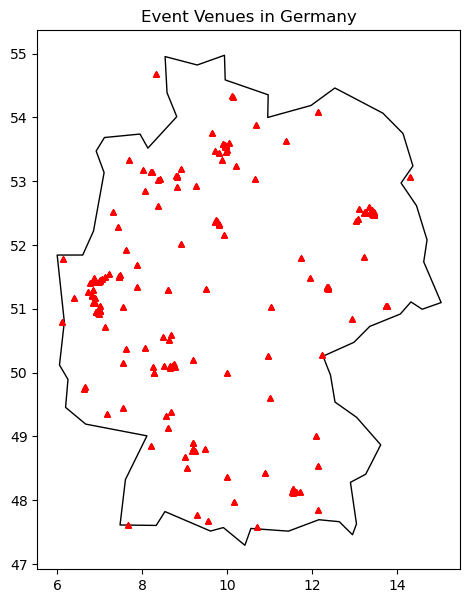

In [10]:
# get a base map of Germany
map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
germany = map[map.name == "Germany"]

# create a GeoDataFrame from our long- and latitude data
geometry = [Point(xy) for xy in zip(venuesGER['longitude'], venuesGER['latitude'])]  # zip() combines long + lat to tuples
gdf = gpd.GeoDataFrame(venuesGER, geometry=geometry)

# plot the map
fig, ax = plt.subplots(figsize=(11, 7))
germany.plot(ax = ax, color='white', edgecolor='black', linewidth=1)
gdf.plot(ax=ax, marker='^', color='red', markersize=10)

ax.set_aspect(1.5)  # counter distortion
ax.set_title("Event Venues in Germany")
plt.show()

&rarr; Overall, the hotspots seem plausible (Cologne/Berlin/Hamburg/Stuttgart/Munich). However, the venues look a bit scarce. Again, possibly too many observations were dropped


***

### Event locations in other countries

<div class="alert alert-block alert-info">
12. Repeat exercises (9) - (11) for another European country of your choice.
</div>

In [11]:
# Advanced GET request ---------------------------------------------------

# make single request
firstVenues_DK = requests.get("https://app.ticketmaster.com/discovery/v2/venues.json?",
                           params = {"apikey": tm_key,
                                     "countryCode": "DK",
                                     "locale": "*",
                                     "size": 400}).json()

# store number of total results in n
n_DK = firstVenues_DK["page"]["totalElements"]

# store number of pages in n_pages
n_perPage_DK = firstVenues_DK["page"]["size"]

# store number of pages in n_pages
n_pages_DK = firstVenues_DK["page"]["totalPages"]


# initiate df collecting all venues in Germany
venuesDK = pd.DataFrame(columns=["name", "city", "postalCode", "address", "url", "longitude", "latitude"],
                         index=range(n_DK))

# initiate row counter
row = 0

In [12]:
%%script echo skipping
# script echo skipping to not evaluate this chunk! The data frame created by this loop was exported and is later re-imported

# loop over all results pages
for i in range(n_pages_DK):
    
    # enforce rate limit
    time.sleep(0.2)
    
    # store results of each page temporarily
    tempResults = requests.get("https://app.ticketmaster.com/discovery/v2/venues.json?",
                               params = {"apikey": tm_key,
                                         "countryCode": "DK",
                                         "locale": "*",
                                         "size": 400}).json()
    
    try:
        # ease of notation again
        tempVenues = tempResults["_embedded"]["venues"]
    
        # loop over all venues on page
        for j, venue in enumerate(tempVenues):
            try:
                venuesDK.iloc[row, 0] = venue["name"]
            except KeyError:
                venuesDK.iloc[row, 0] = np.nan
            try:
                venuesDK.iloc[row, 1] = venue["city"]["name"]
            except KeyError:
                venuesDK.iloc[row, 1] = np.nan
            try:
                venuesDK.iloc[row, 2] = venue["postalCode"]
            except KeyError:
                venuesDK.iloc[row, 2] = np.nan
            try:
                venuesDK.iloc[row, 3] = venue["address"]["line1"]
            except KeyError:
                venuesDK.iloc[row, 3] = np.nan
            try:
                venuesDK.iloc[row, 4] = venue["url"]
            except KeyError:
                venuesDK.iloc[row, 4] = np.nan
            try:
                venuesDK.iloc[row, 5] = venue["location"]["longitude"]
            except KeyError:
                venuesDK.iloc[row, 5] = np.nan
            try:
                venuesDK.iloc[row, 6] = venue["location"]["latitude"]
            except KeyError:
                venuesDK.iloc[row, 6] = np.nan
            row += 1
            
    except KeyError:
        pass


# reset index of data frame
venuesDK.reset_index(drop=True, inplace=True)

# export so the data doesn't have to be requested every time
venuesDK.to_csv("venuesDK_py.csv", index=False)

Couldn't find program: 'echo'


In [13]:
# import previously exported venuesDK data
venuesDK = pd.read_csv("venuesDK_py.csv")

# look at the top of the df
venuesDK.head(30)

,name,city,postalCode,address,url,longitude,latitude
0,Det Ny Teater,København V,1610,Gammel Kongevej 29,https://www.ticketmaster.dk/venue/det-ny-teate...,12.55545,55.67328
1,"Operaen, Holmen",København K,1438,Ekvipagemestervej 10,https://www.ticketmaster.dk/venue/operaen-holm...,12.60202,55.68203
2,Distortion,København K,1432,København,https://www.ticketmaster.dk/venue/distortion-k...,12.56834,55.67610
3,Aveny-T,Frederiksberg C,1820,Frederiksberg Allé 102,https://www.ticketmaster.dk/venue/aveny-t-fred...,12.53316,55.67486
4,Arena Nord,Frederikshavn,9900,Harald Nielsens Plads 9,https://www.ticketmaster.dk/venue/arena-nord-f...,10.51761,57.44190
5,Amager Bio,København S,2300,Øresundsvej 6,https://www.ticketmaster.dk/venue/amager-bio-k...,12.60935,55.65794
6,"Remisen, Godsbanen",Aarhus C,8000,Skovgaardsgade 3,https://www.ticketmaster.dk/venue/remisen-gods...,12.56834,55.67610
7,Wonderfestiwall,Allinge,3770,Slotslyngen,https://www.ticketmaster.dk/venue/wonderfestiw...,14.75344,55.25638
8,Christiansgave,Thisted,7700,Tingstrupvej 2,https://www.ticketmaster.dk/venue/christiansga...,8.68718,56.95730
9,Hotel Cecil,København K,1153,Niels Hemmingsens Gade 10,https://www.ticketmaster.dk/venue/hotel-cecil-...,12.57767,55.67937


&rarr; Looks good

In [14]:
# Visualization Denmark --------------------------------------------------


# 1. Remove lat/long values outside of range

# NaN count before
venuesDK["longitude"].isnull().sum()

0

In [15]:
# set the ranges for Denmark
longitude_rangeDK = (8.0725, 15.1972)
latitude_rangeDK = (54.5833, 57.7525)

# for Denmark there are long/lat values stored as strings, so we convert
venuesDK['longitude'] = pd.to_numeric(venuesDK['longitude'])
venuesDK['latitude'] = pd.to_numeric(venuesDK['latitude'])

# identify rows outside the range and get their index
out_longitudeDK = (venuesDK['longitude'] < longitude_rangeDK[0]) | (venuesDK['longitude'] > longitude_rangeDK[1])
out_latitudeDK = (venuesDK['latitude'] < latitude_rangeDK[0]) | (venuesDK['latitude'] > latitude_rangeDK[1])
out_rangeDK = out_longitudeDK | out_latitudeDK

# set the values outside of range to NaN
venuesDK.loc[out_rangeDK, 'longitude'] = np.nan
venuesDK.loc[out_rangeDK, 'latitude'] = np.nan

venuesDK["longitude"].isnull().sum()

11

&rarr; We removed 11 of 4486 observations

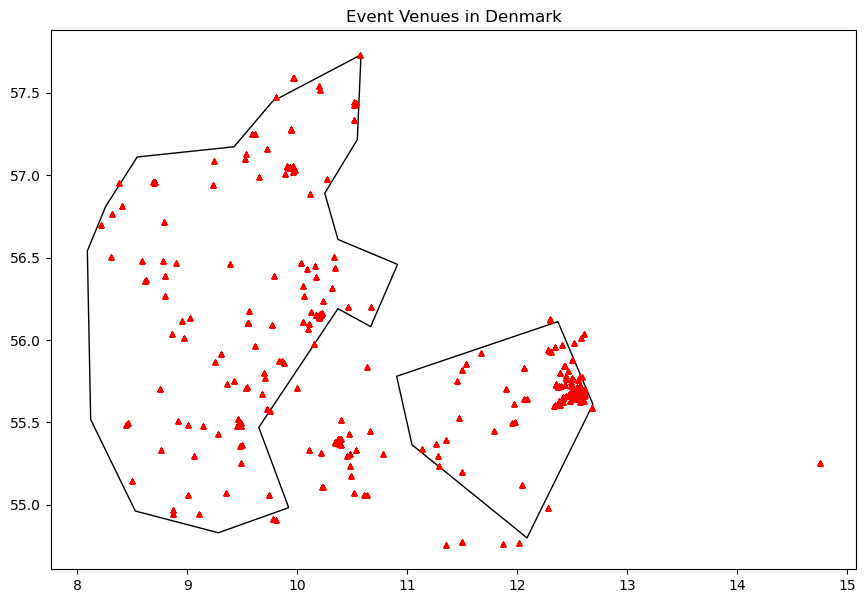

In [16]:
# 2. Create the map

# get a base map of Germany
map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
denmark = map[map.name == "Denmark"]

# create a GeoDataFrame from our long- and latitude data
geometry = [Point(xy) for xy in zip(venuesDK['longitude'], venuesDK['latitude'])]  # zip() combines long + lat to tuples
gdf = gpd.GeoDataFrame(venuesDK, geometry=geometry)

# plot the map
fig, ax = plt.subplots(figsize=(11, 7))
denmark.plot(ax = ax, color='white', edgecolor='black', linewidth=1)
gdf.plot(ax=ax, marker='^', color='red', markersize=10)

ax.set_aspect(1.5)  # counter distortion
ax.set_title("Event Venues in Denmark")
plt.show()

&rarr; The map isn't doing a great job of depicting Denmark, there is basically a piece of land missing. Though for the rest the locations seem relatively plausible (e.g. a lot of venues in and around Kopenhagen in the east)